# This notebook is used to implement mnist dataset recognation.

In [1]:
import sys, os
sys.path.append(os.pardir)

In [2]:
from mnist import MNIST

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
def img_show(image, label):
    plt.imshow(image, cmap='gray')
    plt.title('Label: {}'.format(label))
    plt.show()

In [5]:
def get_data():
    mndata = MNIST(os.getcwd() + '\dataset')
    images, labels = mndata.load_testing()
    images = np.array(images)
    labels = np.array(labels)
    sample_idx = np.random.randint(10001)
    image = images[sample_idx]
    label = labels[sample_idx]
    img_show(image.reshape((28, 28)), label)
    return image, label

In [6]:
import pickle
def init_network():
    with open(os.path.join(os.getcwd(), 'networks', 'pretrain_mnist_weight.pkl'), 'rb') as f:
        network = pickle.load(f)        
    return network

In [7]:
def sigmoid(z):
    """This function used to implement sigmoid function
    Input: x, an array_like object;
    Output: y, output."""
    y = 1 / (1 + np.exp(-z))
    return y

In [8]:
def softmax(x):
    c = np.max(x)
    y = np.exp(x - c) / np.sum(np.exp(x-c))
    return y

In [9]:
def predict(network, x):
    W1, W2, W3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b1']
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    y = softmax(z3)
    return y

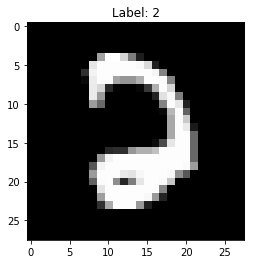

In [10]:
image, label = get_data()

In [35]:
network = init_network()

ValueError: unsupported pickle protocol: 3